In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import h5py

# Dataset of Smiling Faces

In [2]:
train_happyDataset = h5py.File('train_happy.h5')
test_happyDataset = h5py.File('test_happy.h5')

for i in train_happyDataset.items():
    print(i)

print('-'*100)
for i in test_happyDataset.items():
    print(i)

('list_classes', <HDF5 dataset "list_classes": shape (2,), type "<i8">)
('train_set_x', <HDF5 dataset "train_set_x": shape (600, 64, 64, 3), type "|u1">)
('train_set_y', <HDF5 dataset "train_set_y": shape (600,), type "<i8">)
----------------------------------------------------------------------------------------------------
('list_classes', <HDF5 dataset "list_classes": shape (2,), type "<i8">)
('test_set_x', <HDF5 dataset "test_set_x": shape (150, 64, 64, 3), type "|u1">)
('test_set_y', <HDF5 dataset "test_set_y": shape (150,), type "<i8">)


In [3]:
def load_dataset(trainDataset_path, testDataset_path):
    train_dataset = h5py.File(trainDataset_path)
    test_dataset = h5py.File(testDataset_path)
    
    train_X = np.array(train_dataset['train_set_x'])
    train_Y = np.array(train_dataset['train_set_y'])
    
    test_X = np.array(test_dataset['test_set_x'])
    test_Y = np.array(test_dataset['test_set_y'])

    classes = np.array(train_dataset['list_classes'])

    return train_X, train_Y, test_X, test_Y, classes

In [4]:
train_X, train_Y, test_X, test_Y, classes = load_dataset('train_happy.h5', 'test_happy.h5')
classes

array([0, 1], dtype=int64)

In [5]:
def visualize(X, Y, rows, cols):
    n_rows = rows
    n_cols = cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    
    random_indices = np.random.choice(X.shape[0], size = n_rows * n_cols, replace=False)
    
    for i in range(n_rows):
        for j in range(n_cols):
            idx = random_indices[i * n_cols + j]
            axes[i, j].imshow(X[idx])
            axes[i, j].set_title(f"Label: {Y[idx]}")
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

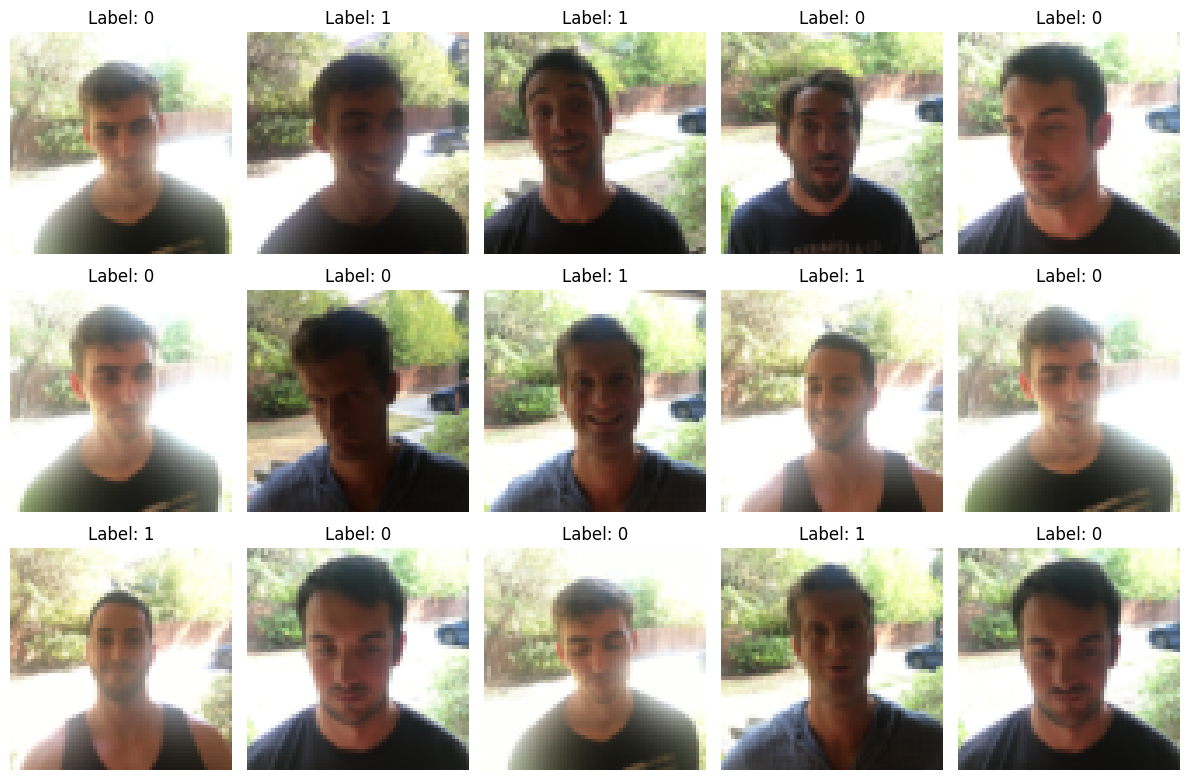

In [6]:
visualize(train_X, train_Y, rows=3, cols=5)

In [7]:
X_train = train_X / 255
X_test =  test_X / 255

Y_train = train_Y.reshape(-1, 1)
Y_test = test_Y.reshape(-1, 1)

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


# Keras Sequential API

### https://www.tensorflow.org/guide/keras/sequential_model

In [8]:
sequential_model = keras.Sequential([
    # Conv Layers
    keras.layers.Input(shape=(64, 64, 3)),
    keras.layers.ZeroPadding2D(padding=(3,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),
    keras.layers.BatchNormalization(axis=3),  # channel
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    # Fully-Connected Layers
    keras.layers.Flatten(),
    keras.layers.Dense(units=1, activation='sigmoid')
])  

In [9]:
sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [10]:
sequential_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

In [11]:
sequential_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5902 - loss: 2.3736
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8860 - loss: 0.2634
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9247 - loss: 0.1859
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9295 - loss: 0.1733
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9739 - loss: 0.0780
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9594 - loss: 0.0852
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9577 - loss: 0.1167
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9658 - loss: 0.1588
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9523 - loss: 0.1267
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9832 - loss: 0.0910


In [12]:
sequential_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9375 - loss: 0.1312


[0.12253931909799576, 0.9466666579246521]

# Dataset of Hand Signs

In [13]:
train_X, train_Y, test_X, test_Y, classes = load_dataset('train_signs.h5', 'test_signs.h5')
classes

array([0, 1, 2, 3, 4, 5], dtype=int64)

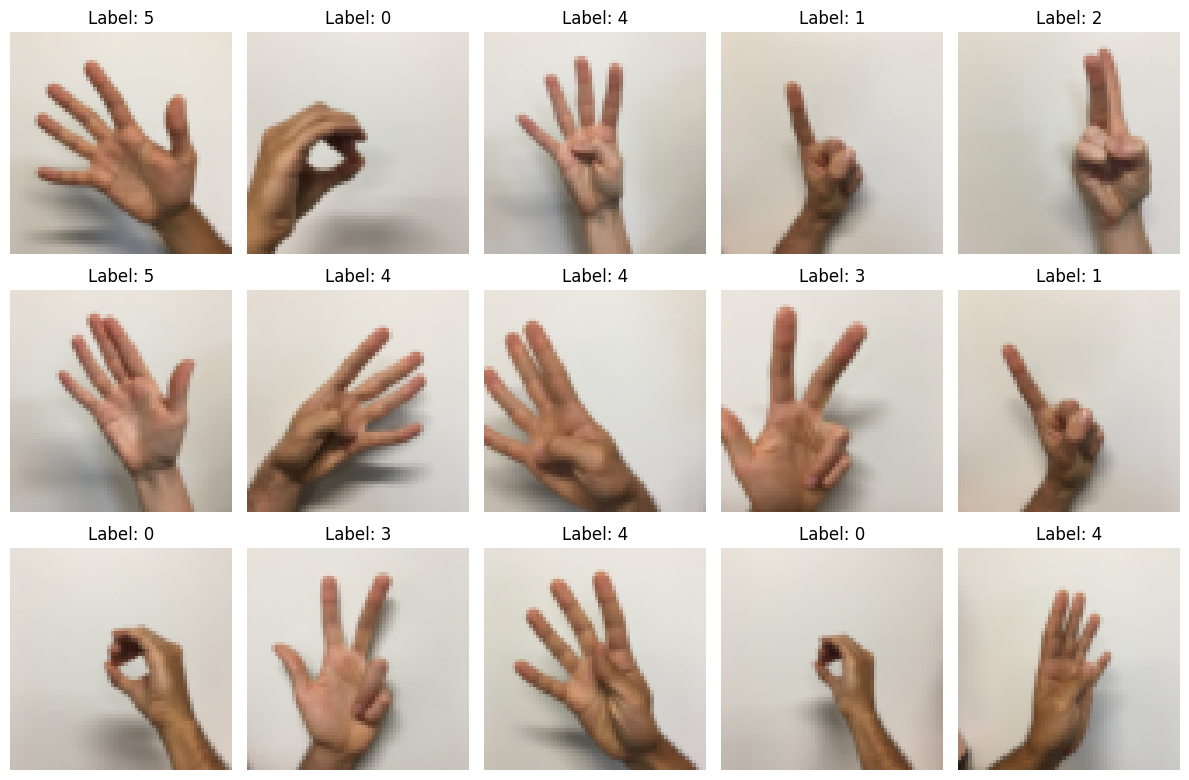

In [14]:
visualize(train_X, train_Y, rows=3, cols=5)

In [15]:
X_train = train_X / 255
X_test =  test_X / 255

Y_train = keras.utils.to_categorical(train_Y, num_classes=6)
Y_test = keras.utils.to_categorical(test_Y, num_classes=6)

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


# Keras Function API

### https://www.tensorflow.org/guide/keras/functional_api

In [16]:
def conv_model(input_shape):
    input = keras.Input(shape=input_shape)
    
    Z1 = keras.layers.Conv2D(filters=8, kernel_size=(4,4), strides=(1,1), padding='same')(input)
    A1 = keras.layers.ReLU()(Z1)
    P1 = keras.layers.MaxPooling2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)

    Z2 = keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same')(P1)
    A2 = keras.layers.ReLU()(Z2)
    P2 = keras.layers.MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)

    F = keras.layers.Flatten()(P2)
    output = keras.layers.Dense(units=6, activation='softmax')(F)

    model = keras.models.Model(inputs=input, outputs=output)
    return model

In [17]:
functional_model = conv_model((64,64,3))
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
functional_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

train_dataset, test_dataset

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 6), dtype=tf.float64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 6), dtype=tf.float64, name=None))>)

In [20]:
training_process = functional_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.1497 - loss: 1.8187 - val_accuracy: 0.1917 - val_loss: 1.7950
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.1596 - loss: 1.7938 - val_accuracy: 0.2000 - val_loss: 1.7893
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1776 - loss: 1.7884 - val_accuracy: 0.2000 - val_loss: 1.7864
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.1757 - loss: 1.7843 - val_accuracy: 0.2333 - val_loss: 1.7841
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2056 - loss: 1.7806 - val_accuracy: 0.2000 - val_loss: 1.7818
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.2141 - loss: 1.7772 - val_accuracy: 0.1833 - val_loss: 1.7783
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.2199 - loss: 1.7728 - val_accuracy: 0.2083 - val_loss: 1.7743
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.2490 - loss: 1.7675 - val_accuracy: 0.

In [21]:
metrics = training_process.history  # store accuracy and loss
df_metrics = pd.DataFrame(metrics)
df_metrics

,accuracy,loss,val_accuracy,val_loss
0,0.150000,1.806044,0.191667,1.794983
1,0.175926,1.791206,0.200000,1.789300
2,0.190741,1.786935,0.200000,1.786363
3,0.191667,1.783230,0.233333,1.784138
4,0.201852,1.779872,0.200000,1.781766
...,...,...,...,...
95,0.886111,0.370390,0.808333,0.514854
96,0.887963,0.367343,0.808333,0.513318
97,0.887963,0.364308,0.808333,0.512373
98,0.888889,0.361453,0.808333,0.510836


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

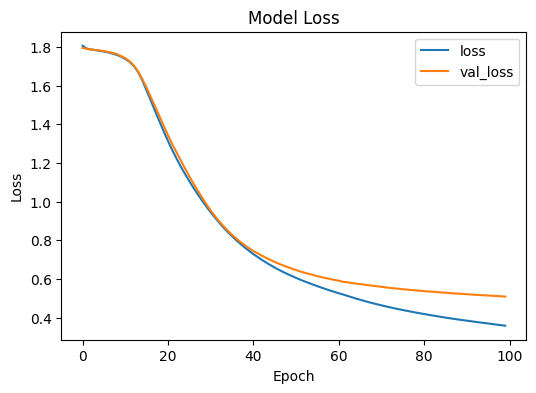

In [22]:
df_loss= df_metrics[['loss','val_loss']]
df_loss.plot(title='Model Loss',figsize=(6,4)).set(xlabel='Epoch', ylabel='Loss')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

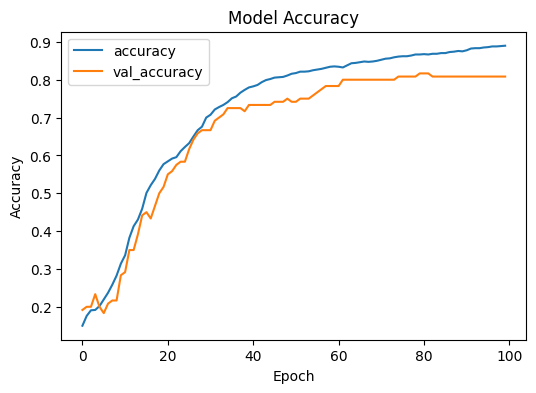

In [23]:
df_acc = df_metrics[['accuracy','val_accuracy']]
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch', ylabel='Accuracy')